/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_3786/3998177690.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["PrgP90"] = df_filtered["PrgP"] / (df_filtered["Min"]/90)
/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_3786/3998177690.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["PrgC90"] = df_filtered["PrgC"] / (df_filtered["Min"]/90)
/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_3786/3998177690.py:10: SettingWithCopyWarning: 
A value is 

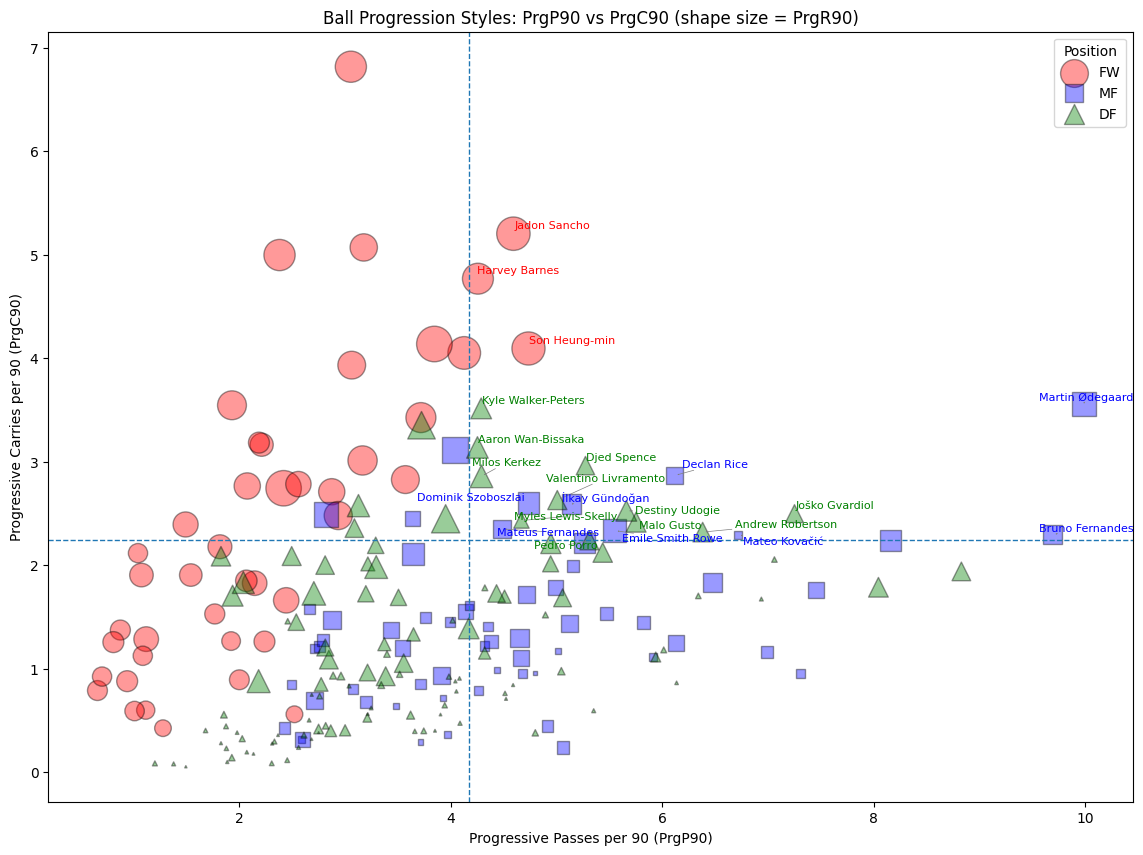

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

df = pd.read_csv("../data/fbref_PL_2024-25.csv")
df_filtered=df[df["Min"] >= 900]

df_filtered["PrgP90"] = df_filtered["PrgP"] / (df_filtered["Min"]/90)
df_filtered["PrgC90"] = df_filtered["PrgC"] / (df_filtered["Min"]/90)
df_filtered["PrgR90"] = df_filtered["PrgR"] / (df_filtered["Min"]/90)

d = df_filtered[(df_filtered["Min"] >= 900) &
                ((df_filtered["PrgP90"]>0) | (df_filtered["PrgC90"]>0) | (df_filtered["PrgR90"]>0))].copy()

x, y, r = "PrgP90", "PrgC90", "PrgR90"

x_thr = d[x].quantile(0.70)
y_thr = d[y].quantile(0.70)

size_scale = 0.99

pos_style = {"FW":("red","o"), "MF":("blue","s"), "DF":("green","^")}
plt.figure(figsize=(14,10))

texts = []
for pos, (color, marker) in pos_style.items():
    dd = d[d["Pos"]==pos]
    plt.scatter(dd[x], dd[y],
                s=((dd[r].fillna(0))/size_scale*50),
                c=color, marker=marker, alpha=0.4, edgecolor="k", label=pos)
    elite = dd[(dd[x] >= x_thr) & (dd[y] >= y_thr)]
    for _, row in elite.iterrows():
        texts.append(plt.text(row[x], row[y], row["Player"],
                              fontsize=8, color=color))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))
plt.axvline(x_thr, ls="--", lw=1); plt.axhline(y_thr, ls="--", lw=1)



plt.xlabel("Progressive Passes per 90 (PrgP90)")
plt.ylabel("Progressive Carries per 90 (PrgC90)")
plt.title("Ball Progression Styles: PrgP90 vs PrgC90 (shape size = PrgR90)")
plt.legend(title="Position")
plt.savefig("../figures/progression_3way_bubble.png", dpi=300, bbox_inches="tight")
plt.show()